In [1]:
from definitions_equiang import *
num_cores = multiprocessing.cpu_count()

In [2]:
Graphs5 = load_plantri(filename='plantri/10pc3')
print(f'Loaded {len(Graphs5)} graphs from plantri.')

inputs = tqdm(Graphs5)
if __name__ == "__main__":
    processed_list = Parallel(n_jobs=num_cores)(delayed(add_distinguished)(G) for G in inputs)
Graphs5 = [G for DGraph in processed_list for G in DGraph]
print(f'Constructed {len(Graphs5)} graphs with a distinguished vertex.')

inputs = tqdm(Graphs5)
if __name__ == "__main__":
    processed_list = Parallel(n_jobs=num_cores)(delayed(second_filter)(G) for G in inputs)
Graphs5_3 = [Graphs5[i] for i in range(len(Graphs5)) if processed_list[i]]
print(f'There are {len(Graphs5_3)} triangular graphs.')
save_data(Graphs5_3,'graphs/equiangular_filtered_5_3.txt')

inputs = tqdm(Graphs5)
if __name__ == "__main__":
    processed_list = Parallel(n_jobs=num_cores)(delayed(has_min_deg)(G,4) for G in inputs)
Graphs5_4 = [Graphs5[i] for i in range(len(Graphs5)) if processed_list[i]]
print(f'There are {len(Graphs5_4)} quadrilateral graphs.')
save_data(Graphs5_4,'graphs/equiangular_filtered_5_4.txt')

inputs = tqdm(Graphs5_4)
if __name__ == "__main__":
    processed_list = Parallel(n_jobs=num_cores)(delayed(has_min_deg)(G,5) for G in inputs)
Graphs5_5 = [Graphs5_4[i] for i in range(len(Graphs5_4)) if processed_list[i]]
print(f'There are {len(Graphs5_5)} pentagonal graphs.')

Loaded 32300 graphs from plantri.


100%|██████████| 32300/32300 [00:06<00:00, 5268.29it/s]


Constructed 5842 graphs with a distinguished vertex.


100%|██████████| 5842/5842 [00:01<00:00, 4910.29it/s]


There are 1864 triangular graphs.


100%|██████████| 5842/5842 [00:01<00:00, 4912.34it/s]


There are 107 quadrilateral graphs.


100%|██████████| 107/107 [00:00<00:00, 2318.95it/s]


There are 0 pentagonal graphs.


Incidence graph 1155


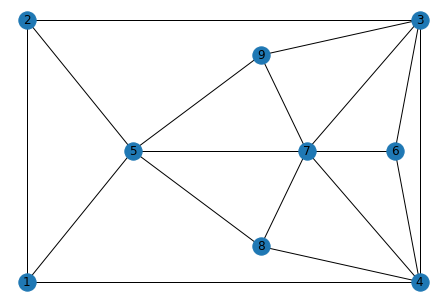


Assuming T has labeling: (sa)(sa)(so)

  Assigning the angle in tile 5 incident to tiles [2, 1, 5]
    - to vertex 0 of T which has angle-type '(sa)'
      Only this vertex of T is considered, cyclic permutations of this labeling are considered separately
      Impossible: Sum of angles at this tiling-vertex would be too small
  Possible assignments: []

Found 0 possible solutions.

-------------------------------------------------

Assuming T has labeling: (sa)(ma)(so)

  Assigning the angle in tile 5 incident to tiles [2, 1, 5]
    - to vertex 0 of T which has angle-type '(sa)'
      Only this vertex of T is considered, cyclic permutations of this labeling are considered separately
      Impossible: Sum of angles at this tiling-vertex would be too small
  Possible assignments: []

Found 0 possible solutions.

-------------------------------------------------

Assuming T has labeling: (sa)(la)(la)

  Assigning the angle in tile 5 incident to tiles [2, 1, 5]
    - to vertex 0 of T whi

In [3]:
import random
save_ang_perms(3,'equiangular_3_perms.txt', use5AT = True)
Graphs5_3 = load_data('graphs/equiangular_filtered_5_3.txt')

ig=random.randrange(len(Graphs5_3))
print('Incidence graph',ig)
G=Graphs5_3[ig]
G.draw()

possibleSolutions = search(ig,G,'equiangular_3_perms.txt',PrintProof = True, use5AT = True)

sols = []
for num,ps in enumerate(possibleSolutions):
    a=solve(ps.AngleEqs)
    if a not in sols:
        print(f'Possible solution number {num + 1} could be realized with the following equations:')
        sols.append(a)
        print(f'   {a}')
    else:
        print(f'Possible solution number {num + 1} is equivalent to a previous possible solution.')

Incidence graph 79


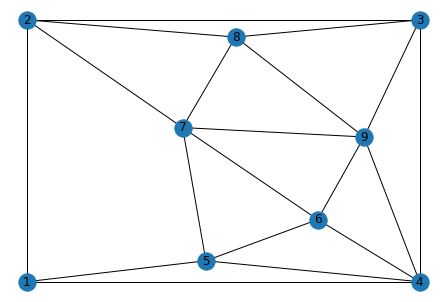


Assuming T has labeling: aaao

  Assigning the angle in tile 5 incident to tiles [2, 1, 5, 7]
    - to vertex 0 of T which has angle-type 'a'
      Only this vertex of T is considered, cyclic permutations of this labeling are considered separately
  Possible assignments: [0]

  Assign 0 to (5, [2, 1, 5, 7])
    No new angle equation

This case has the following possibilities:
  Assigning the angle in tile 7 incident to tiles [2, 1, 5, 7]
    - to vertex 0 of T which has angle-type 'a'
    - to vertex 1 of T which has angle-type 'a'
    - to vertex 2 of T which has angle-type 'a'
    - to vertex 3 of T which has angle-type 'o'
      Impossible: Sum of angles at this tiling-vertex would be too large
    Angle-type 'p'
      Impossible: Sum of angles at this tiling-vertex would be too large
  Possible assignments: [0, 1, 2]

Case 1.
  Assign 0 to (7, [2, 1, 5, 7])
    New angle equation: +x0+x0-90=0
    Reduced angle equations:
      {x0 = 45.0, x1 = -x2 - x3 + 315.0}

Case 2.
  Assign 1

In [4]:
import random
save_ang_perms(4,'equiangular_4_perms.txt')
Graphs5_4 = load_data('equiangular_filtered_5_4.txt')

ig=random.randrange(len(Graphs5_4))
print('Incidence graph',ig)
G=Graphs5_4[ig]
G.draw()

possibleSolutions = search(ig,G,'equiangular_4_perms.txt',PrintProof = True)

sols = []
for num,ps in enumerate(possibleSolutions):
    a=solve(ps.AngleEqs)
    if a not in sols:
        print(f'Possible solution number {num + 1} could be realized with the following equations:')
        sols.append(a)
        print(f'   {a}')
    else:
        print(f'Possible solution number {num + 1} is equivalent to a previous possible solution.')